In [1]:
import gym
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

#env = gym.make('FrozenLake-v0')
env = gym.make('FrozenLake8x8-v0')


env.render()

[2017-01-22 15:19:21,969] Making new env: FrozenLake8x8-v0


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG



In [123]:
env.action_space

Discrete(4)

# Value Iteration

![title](VI.png)

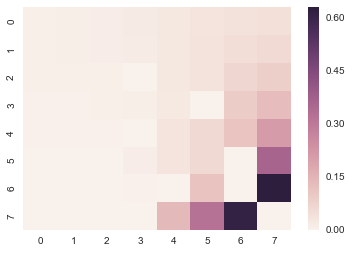

In [159]:
# 0 is left, 1 is down, 2 is right, and 3 is up

size = env.observation_space.n

V = np.zeros((size))
y = 0.9

epsilon = 1e-5

env.reset()

for i in range(0, 1000):
    delta = 0.0
    for s in range(0, env.observation_space.n):
        action_value = np.zeros((4))
        v = V[s]
        for a in env.P[s]:
            for p, s_new, r, term in env.P[s][a]:
                action_value[a] += p*(r + y * V[s_new])
        V[s] = np.max(action_value)
        delta = np.max((delta, np.abs(V[s]-v)))
    if delta<epsilon:
        break

size_sqrt = int(np.sqrt(size))
sns.heatmap(V.reshape((size_sqrt, size_sqrt)))
sns.plt.show()

In [163]:
print env.P[59][1]


[(1.0, 59, 0, True)]
[(1.0, 63, 0, True)]


# Policy Iteration

![title](PI.png)

In [20]:


pi

array([1, 0, 2, 3, 0, 1, 3, 3, 1, 1, 2, 1, 2, 2, 3, 3, 0, 0, 1, 1, 0, 1, 2,
       0, 3, 3, 0, 1, 0, 2, 0, 3, 0, 0, 3, 2, 0, 3, 3, 2, 0, 1, 1, 3, 1, 3,
       1, 0, 3, 3, 0, 1, 1, 3, 3, 1, 3, 1, 0, 3, 0, 1, 2, 3])

In [ ]:
nb_actions = 4
nb_states = 8*8

prob = np.random.dirichlet(np.repeat(1, nb_actions), nb_states)

pi = np.argmax(prob, axis=1)

y = 0.9

epsilon = 1e-5

size = env.observation_space.n
import pdb
V = np.zeros((size))

def policyEvaluation(pi, V, env):
    
    for i in range(0, 1000):
        delta = 0
        for s in range(0, env.observation_space.n):
            v = V[s]
            V[s] = 0
            a = pi[s]
            for p, s_new, r, term in env.P[s][a]:
                V[s] += p * (r + V[s_new])
            delta = np.max((delta, np.abs(V[s]-v)))
        if delta < epsilon:
            print "Here"
            return V
            
def policyImprovement(pi, V, env):
    policy_stable = True
    for i in range(0, 10):
        for s in range(0, env.observation_space.n):
            old_action = pi[s]
            action_value = np.zeros((4))
            for a in env.P[s]:
                for p, s_new, r, term in env.P[s][a]:
                    action_value[a] += p*(r + y * V[s_new])
            pi[s] = np.argmax(action_value)
            
            if old_action != pi[s]:
                policy_stable = False
                
        if policy_stable:
            return pi, V
        else:
            V = policyEvaluation(pi, V, env)
            print V
            
pi_opt, V_opt = policyImprovement(pi, V, env)

pi_opt

 0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.111111111111
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.037037037037
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.037037037037
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0246913580247
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0082304526749
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0123456790123
0.0
0.0
0.0


![title](MPI.png)

![title](GS.png)